In [1]:
import os
import random

# 基本的なライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 描画ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

# データセット分割
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 前処理
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# 特徴量選択
from sklearn.feature_selection import (
    SequentialFeatureSelector,
    VarianceThreshold,
    RFE,
    RFECV,
)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# 機械学習モデル
from sklearn.linear_model import LogisticRegression  # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier  # K近傍法
from sklearn.svm import SVC  # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # 決定木
from sklearn.ensemble import RandomForestClassifier  # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost
from sklearn.naive_bayes import GaussianNB  # ナイーブ・ベイズ
from sklearn.decomposition import LatentDirichletAllocation as LDA  # 線形判別分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA  # 二次判別分析

# 学習中
from tqdm import tqdm
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings

import config

SEED = config.SEED


from functions import *

fix_seed(SEED)


# 最大表示列数の指定（ここでは50列を指定）N
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

%matplotlib inline

/Users/masanari/Library/CloudStorage/OneDrive-東京理科大学/projects/breast_cancer_analytics/notebooks/functions.py:247: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y: pd.Series(),


# データ読み込み

In [2]:
X = pd.read_pickle(config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X.pkl")
y = pd.read_pickle(config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/y.pkl")


X_train_chi2 = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_train_chi2.pkl"
)
X_test_chi2 = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_test_chi2.pkl"
)

"""

X_train_chi2_norm = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_train_chi2_norm.pkl"
)
X_test_chi2_norm = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_test_chi2_norm.pkl"
)
"""

X_train_ANOVA = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_train_ANOVA.pkl"
)
X_test_ANOVA = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_test_ANOVA.pkl"
)
"""
X_train_ANOVA_std = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_train_ANOVA_std.pkl"
)
X_test_ANOVA_std = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_test_ANOVA_std.pkl"
)

X_train_ANOVA_norm = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_train_ANOVA_norm.pkl"
)
X_test_ANOVA_norm = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/X_test_ANOVA_norm.pkl"
)
"""
y_train = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/y_train.pkl"
)
y_test = pd.read_pickle(
    config.INTERIM_PICKLE_PREPROCESSED_OS5YEARS_GENES_DIR + "/y_test.pkl"
)

## ベースラインの精度

全てFalseと予測（学習データはFalseが多いため）した場合のスコア

False    1076
True      344
Name: target_OS_5years, dtype: int64

False    347
True     127
Name: target_OS_5years, dtype: int64

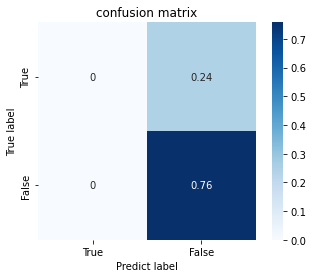

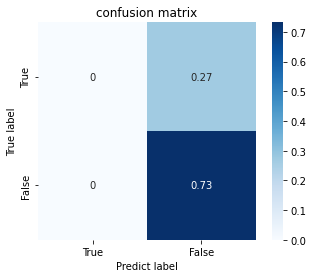

In [3]:
# trainのベースライン
y_train_base = pd.Series([False for i in range(y_train.shape[0])], index=y_train.index)
display(y_train.value_counts())
plot_confusion_matrix(y_train, y_train_base)
# testのベースライン（本命）
y_test_base = pd.Series([False for i in range(y_test.shape[0])], index=y_test.index)
display(y_test.value_counts())
plot_confusion_matrix(y_test, y_test_base)

# 様々な機械学習手法の比較

様々な機械学習手法を用いて2値分類を行う。  
簡単に精度を見るため、再現性は担保されていない（引数にrandom_stateを要求しないclfもあるため）ので、必要に応じて再度モデルを構築すること。  
また、パラメータはデフォルト値を使用している。  
そのためパラメータ次第では結果が向上、下降しうる（決定木のf1など）。  

## 特徴量抽出した各データでの精度比較

### χ^2検定

In [4]:
# 2値分類機の性能比較（特徴量抽出手法：chi2、パラメータ：デフォルト）
display(compare_bcms(X_train_chi2, y_train))
display(compare_bcms(X_train_chi2, y_train, standardization=True))
display(compare_bcms(X_train_chi2, y_train, normalization=True))
display(
    compare_bcms(
        X_train_chi2,
        y_train,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)
display(
    compare_bcms(
        X_train_chi2,
        y_train,
        standardization=True,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)
display(
    compare_bcms(
        X_train_chi2,
        y_train,
        normalization=True,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)

11it [00:50,  4.57s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.682786,0.680282,0.460842,0.450793
Polynomial SVM,0.998826,0.697183,0.997559,0.331930
Decision Tree,1.000000,0.671127,1.000000,0.329489
Nearest Neighbors,0.800235,0.734507,0.475893,0.296069
AdaBoost,0.830203,0.717606,0.571146,0.289049
Linear SVM,0.808607,0.740141,0.465637,0.267489
Logistic Regression,0.800000,0.726761,0.458641,0.264931
Random Forest,1.000000,0.747183,1.000000,0.114264
Quadratic Discriminant Analysis,0.995931,0.751408,0.991568,0.084749


11it [00:40,  3.69s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.682786,0.680282,0.460842,0.450793
Sigmoid SVM,0.713537,0.705634,0.347039,0.331750
Decision Tree,1.000000,0.671127,1.000000,0.329489
Nearest Neighbors,0.802191,0.726761,0.482290,0.292240
AdaBoost,0.830203,0.717606,0.571146,0.289049
Logistic Regression,0.800782,0.724648,0.460955,0.263771
Linear SVM,0.808998,0.738028,0.465391,0.254491
Polynomial SVM,0.860094,0.749296,0.593819,0.140571
Random Forest,1.000000,0.747183,1.000000,0.114264


11it [00:43,  3.93s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.682786,0.680282,0.460842,0.450793
Sigmoid SVM,0.713537,0.705634,0.347039,0.331750
Decision Tree,1.000000,0.671127,1.000000,0.329489
Nearest Neighbors,0.802191,0.726761,0.482290,0.292240
AdaBoost,0.830203,0.717606,0.571146,0.289049
Logistic Regression,0.800782,0.724648,0.460955,0.263771
Linear SVM,0.808998,0.738028,0.465391,0.254491
Polynomial SVM,0.860094,0.749296,0.593819,0.140571
Random Forest,1.000000,0.747183,1.000000,0.114264


11it [01:25,  7.78s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.652941,0.671831,0.635836,0.455169
Nearest Neighbors,0.695041,0.414789,0.764738,0.407257
Linear SVM,0.774254,0.616901,0.784981,0.399136
Logistic Regression,0.755253,0.623944,0.760809,0.393565
RBF SVM,0.851941,0.680282,0.853821,0.391571
AdaBoost,0.817030,0.637324,0.821764,0.379442
Sigmoid SVM,0.527290,0.473239,0.528686,0.340594
Polynomial SVM,1.000000,0.683099,1.000000,0.332342
Decision Tree,1.000000,0.610563,1.000000,0.320356


11it [01:02,  5.68s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.652334,0.670423,0.634769,0.452899
Sigmoid SVM,0.618227,0.596479,0.617231,0.401512
Nearest Neighbors,0.676807,0.390845,0.754502,0.398857
Logistic Regression,0.761506,0.621831,0.766978,0.386771
Linear SVM,0.776637,0.604225,0.787295,0.378149
AdaBoost,0.815967,0.619718,0.820107,0.357875
RBF SVM,0.947475,0.711972,0.947596,0.343618
Random Forest,1.000000,0.727465,1.000000,0.341514
Decision Tree,1.000000,0.620423,1.000000,0.326650


11it [00:54,  4.94s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.652334,0.670423,0.634769,0.452899
Sigmoid SVM,0.618227,0.596479,0.617231,0.401512
Nearest Neighbors,0.676807,0.390845,0.754502,0.398857
Logistic Regression,0.761506,0.621831,0.766978,0.386771
Linear SVM,0.776637,0.604225,0.787295,0.378149
AdaBoost,0.815967,0.619718,0.820107,0.357875
RBF SVM,0.947475,0.711972,0.947596,0.343618
Random Forest,1.000000,0.727465,1.000000,0.341514
Decision Tree,1.000000,0.620423,1.000000,0.326650


### ANOVA

In [5]:
# 2値分類機の性能比較（特徴量抽出手法：chi2、パラメータ：デフォルト）
display(compare_bcms(X_train_ANOVA, y_train))
display(compare_bcms(X_train_ANOVA, y_train, standardization=True))
display(compare_bcms(X_train_ANOVA, y_train, normalization=True))
display(
    compare_bcms(
        X_train_ANOVA,
        y_train,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)
display(
    compare_bcms(
        X_train_ANOVA,
        y_train,
        standardization=True,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)
display(
    compare_bcms(
        X_train_ANOVA,
        y_train,
        normalization=True,
        over_sampling_class=SMOTE(sampling_strategy="minority", random_state=SEED),
    )
)

11it [15:23, 84.00s/it] 


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Naive Bayes,0.701408,0.688028,0.503183,0.469138
Linear SVM,1.000000,0.734507,1.000000,0.397071
Polynomial SVM,1.000000,0.735211,1.000000,0.395174
Logistic Regression,1.000000,0.747887,1.000000,0.390228
AdaBoost,0.909155,0.711268,0.791950,0.314357
Decision Tree,1.000000,0.657042,1.000000,0.309789
Nearest Neighbors,0.799452,0.738028,0.435148,0.246056
Quadratic Discriminant Analysis,1.000000,0.609859,1.000000,0.203472
Random Forest,1.000000,0.754930,1.000000,0.075317


11it [16:04, 87.70s/it] 


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Linear SVM,1.000000,0.824648,1.000000,0.579017
Logistic Regression,1.000000,0.825352,1.000000,0.559328
Naive Bayes,0.701408,0.688028,0.503183,0.469138
Quadratic Discriminant Analysis,1.000000,0.390141,1.000000,0.354111
Sigmoid SVM,0.811894,0.776056,0.470926,0.336687
AdaBoost,0.909155,0.711268,0.791950,0.314357
Decision Tree,1.000000,0.657042,1.000000,0.309789
Nearest Neighbors,0.802269,0.750704,0.400107,0.223162
Random Forest,1.000000,0.754930,1.000000,0.075317


11it [14:55, 81.40s/it] 


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Linear SVM,1.000000,0.824648,1.000000,0.579017
Logistic Regression,1.000000,0.825352,1.000000,0.559328
Naive Bayes,0.701408,0.688028,0.503183,0.469138
Quadratic Discriminant Analysis,1.000000,0.390141,1.000000,0.354111
Sigmoid SVM,0.811894,0.776056,0.470926,0.336687
AdaBoost,0.909155,0.711268,0.791950,0.314357
Decision Tree,1.000000,0.657042,1.000000,0.309789
Nearest Neighbors,0.802269,0.750704,0.400107,0.223162
Random Forest,1.000000,0.754930,1.000000,0.075317


11it [24:42, 134.75s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
RBF SVM,0.773711,0.678873,0.774919,0.449977
Naive Bayes,0.702653,0.661972,0.701258,0.443964
Logistic Regression,1.000000,0.731690,1.000000,0.408972
Linear SVM,1.000000,0.734507,1.000000,0.397071
Nearest Neighbors,0.609859,0.319718,0.718829,0.395025
Polynomial SVM,1.000000,0.733803,1.000000,0.394140
Sigmoid SVM,0.500000,0.242254,0.666667,0.388349
Decision Tree,1.000000,0.630986,1.000000,0.335357
AdaBoost,0.912954,0.654225,0.913357,0.318737


11it [21:01, 114.66s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Logistic Regression,1.000000,0.829577,1.000000,0.593923
Linear SVM,1.000000,0.824648,1.000000,0.579017
Sigmoid SVM,0.839557,0.715493,0.845733,0.507730
Naive Bayes,0.705019,0.655634,0.710161,0.443377
Nearest Neighbors,0.553855,0.281690,0.691262,0.391099
AdaBoost,0.913316,0.683803,0.913802,0.384889
Polynomial SVM,0.995920,0.752817,0.995899,0.345312
Random Forest,1.000000,0.749296,1.000000,0.315400
RBF SVM,0.998760,0.788732,0.998758,0.305454


11it [20:48, 113.52s/it]


,acc_train,acc_test,f1_train,f1_test
classifier,,,,
Logistic Regression,1.000000,0.829577,1.000000,0.593923
Linear SVM,1.000000,0.824648,1.000000,0.579017
Sigmoid SVM,0.839557,0.715493,0.845733,0.507730
Naive Bayes,0.705019,0.655634,0.710161,0.443377
Nearest Neighbors,0.553855,0.281690,0.691262,0.391099
AdaBoost,0.913316,0.683803,0.913802,0.384889
Polynomial SVM,0.995920,0.752817,0.995899,0.345312
Random Forest,1.000000,0.749296,1.000000,0.315400
RBF SVM,0.998760,0.788732,0.998758,0.305454


In [6]:
# 学習データ数
X_train_ANOVA.shape

(1420, 6720)

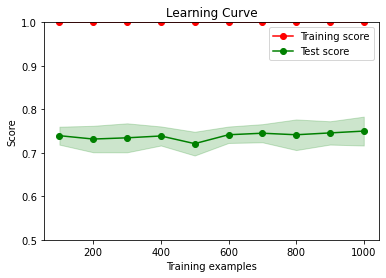

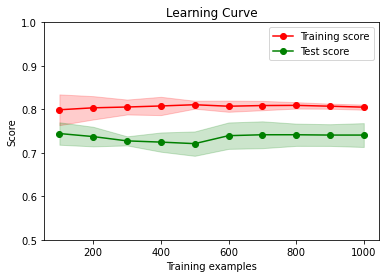

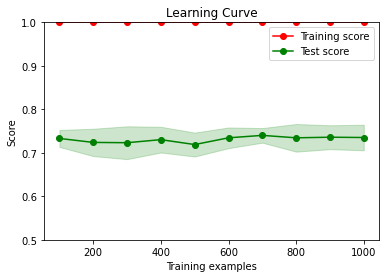

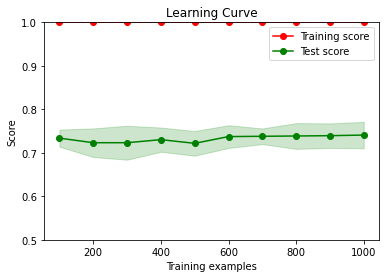

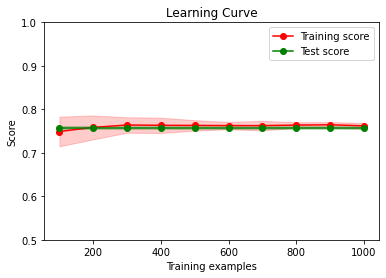

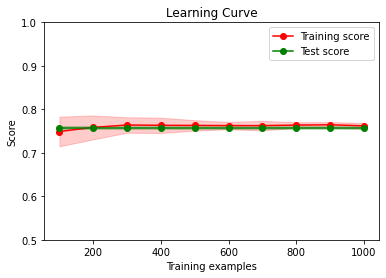

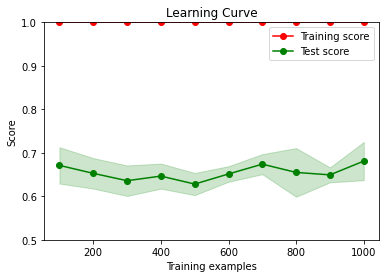

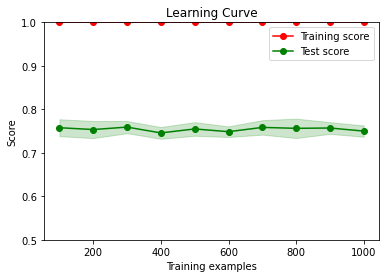

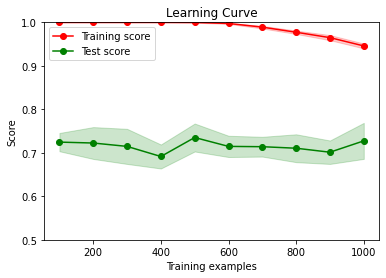

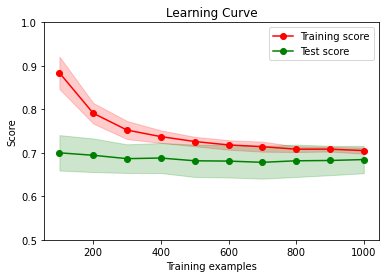

/Users/masanari/.anyenv/envs/pyenv/versions/miniforge3-4.10/envs/breast-cancer-analytics/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/masanari/.anyenv/envs/pyenv/versions/miniforge3-4.10/envs/breast-cancer-analytics/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/masanari/.anyenv/envs/pyenv/versions/miniforge3-4.10/envs/breast-cancer-analytics/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/masanari/.anyenv/envs/pyenv/versions/miniforge3-4.10/envs/breast-cancer-analytics/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/masanari/.anyenv/envs/pyenv/versions/miniforge3-4.10/

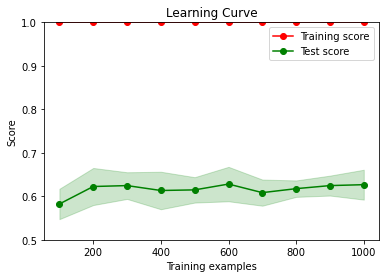

In [8]:
# chi2にて特徴量選択したデータを元に、各モデルでの学習曲線を可視化
# 正規化したほうが全体的に精度が高かったので、そちらを使用
for estimator in classifiers:
    plot_learning_curve(
        X_train_ANOVA,
        y_train,
        estimator,
        cv=10,
        train_sizes=np.arange(100, int(len(X_train_chi2) * 0.75), 100),
    )

# Wrapper メソッド

## SFS(Sequential Feature Selection): 逐次特徴選択

https://qiita.com/FukuharaYohei/items/db88a8f4c4310afb5a0d

In [ ]:
X_train_chi2.shape

In [ ]:
# Forward Selection
%time

sel = VarianceThreshold()

# ランダムフォレストを使う
rf = RandomForestClassifier()

# 50個に制限
selector = SequentialFeatureSelector(rf, n_features_to_select=50, cv=10)
X_train_front_selected = pd.DataFrame(
    selector.fit_transform(X_train_chi2, y_train),
    columns=X_train_chi2.columns.values[selector.get_support()],
)
result = pd.DataFrame(
    selector.get_support(),
    index=X_train_chi2.columns.values,
    columns=["False: dropped"],
)
print(result)

In [ ]:
X_train_front_selected

In [ ]:
# 2値分類機の性能比較（パラメータ：デフォルト）
compare_bcms(X_train_front_selected, y_train)

In [ ]:
%%time
selector = SequentialFeatureSelector(
    rf, n_features_to_select=30, direction="backward", cv=5
)

X_train_back_selected = pd.DataFrame(
    selector.fit_transform(X_train_front_selected, y_train),
    columns=X_train_front_selected.columns.values[selector.get_support()],
)
result = pd.DataFrame(
    selector.get_support(),
    index=X_train_front_selected.columns.values,
    columns=["False: dropped"],
)
print(result)

In [ ]:
# 2値分類機の性能比較（パラメータ：デフォルト）
compare_bcms(X_train_back_selected, y_train)

In [ ]:
# chi2にて特徴量選択したデータを元に、各モデルでの学習曲線を可視化
for estimator in classifiers:
    plot_learning_curve(
        X_train_back_selected,
        y_train,
        estimator,
        train_sizes=np.arange(100, int(len(X_train_chi2) * 0.75), 100),
    )

# RFE

1. 全特徴量で訓練しモデルを生成
2. 最低のFeature Importnace/ Coef の特徴量を1つ減らして訓練しモデルを生成
3. 2のステップを残す特徴量の数に達するまで繰り返し

In [ ]:
%%time
selector = RFE(rf, n_features_to_select=8)


X_train_rfe = pd.DataFrame(
    selector.fit_transform(X_train_chi2, y_train),
    columns=X_train_chi2.columns.values[selector.get_support()],
)
result = pd.DataFrame(
    selector.get_support(),
    index=X_train_chi2.columns.values,
    columns=["False: dropped"],
)
result["ranking"] = selector.ranking_
print(result)

In [ ]:
display(compare_bcms(X_train_rfe, y_train))
# chi2にて特徴量選択したデータを元に、各モデルでの学習曲線を可視化
for estimator in classifiers:
    plot_learning_curve(
        X_train_rfe,
        y_train,
        estimator,
        train_sizes=np.arange(100, int(len(X_train_chi2) * 0.75), 100),
    )